# Introduction to Convolutional neural networks and computer vision using tensorflow

- finding patterns in a picture.
- like a object detected by self driving car camera




# Get data

 starting small to experiment easily.
 
 Converted Food101(https://www.kaggle.com/datasets/dansbecker/food-101) to binary classification and arragned data using https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb


In [9]:
import zipfile

!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-12 08:32:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.1MB/s    in 3.9s    

2023-02-12 08:32:11 (27.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# First step is becoming one with the data.

for computer vision , visualize your images.


In [10]:
!ls data/pizza_steak/test/pizza


ls: data/pizza_steak/test/pizza: No such file or directory


In [9]:
import os

for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
    print(f"there are {len(dirnames)} directiores in {len(filenames)} images in {dirpath}")

there are 2 directiores in 0 images in data/pizza_steak
there are 2 directiores in 0 images in data/pizza_steak/test
there are 0 directiores in 250 images in data/pizza_steak/test/steak
there are 0 directiores in 250 images in data/pizza_steak/test/pizza
there are 2 directiores in 0 images in data/pizza_steak/train
there are 0 directiores in 750 images in data/pizza_steak/train/steak
there are 0 directiores in 750 images in data/pizza_steak/train/pizza


In [2]:
import pathlib
import numpy as np

data_dir = pathlib.Path("data/pizza_steak/test")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [3]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    
    random_choice = random.sample(os.listdir(target_folder), 1)
    
    img = mpimg.imread(target_folder + '/' + random_choice[0])
    
    plt.imshow(img)
    plt.title(target_class)
    
    plt.axis('off')
    print(f"Image shape : {img.shape}")
    
    plt.show()
    
    return img

Image shape : (384, 512, 3)


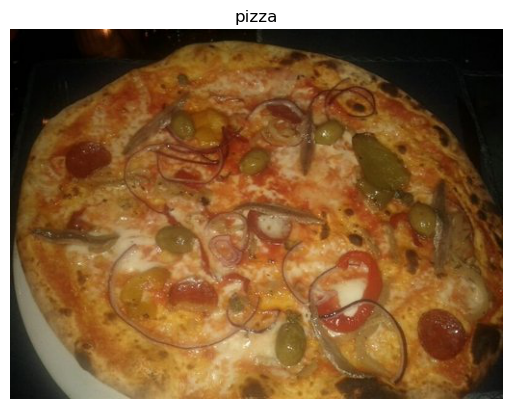

In [5]:
img = view_random_image('./data/pizza_steak/train/', 'pizza')


In [6]:
import tensorflow as tf

In [115]:
tf.constant(img)

Metal device set to: Apple M1 Pro


2023-02-12 08:56:47.115089: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-12 08:56:47.115613: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 83,  74,  69],
        [ 84,  75,  70],
        [ 85,  76,  71],
        ...,
        [ 10,   9,  14],
        [ 10,   9,  14],
        [ 10,   9,  14]],

       [[ 83,  74,  69],
        [ 83,  74,  69],
        [ 84,  75,  70],
        ...,
        [ 10,   9,  14],
        [ 10,   9,  14],
        [ 10,   9,  14]],

       [[ 82,  73,  68],
        [ 83,  74,  69],
        [ 84,  75,  70],
        ...,
        [ 11,  10,  15],
        [ 11,  10,  15],
        [ 11,  10,  15]],

       ...,

       [[155, 191, 213],
        [157, 193, 215],
        [157, 193, 215],
        ...,
        [ 78, 102, 128],
        [ 72,  96, 122],
        [ 70,  94, 120]],

       [[158, 194, 216],
        [158, 194, 216],
        [157, 193, 215],
        ...,
        [ 81, 105, 131],
        [ 77, 101, 127],
        [ 75,  99, 125]],

       [[160, 196, 218],
        [159, 195, 217],
        [157, 193, 215],
        ...,
        [ 85, 109, 13

In [116]:
img.shape # returns width height and color

(384, 512, 3)

# End to end example:
- load images
- Pre process images
- Build a CNN to find patterns in our images
- Compile CNN
- Fit CNN with our image data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [154]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# path to data directory
train_dir = './data/pizza_steak/train'
test_dir = './data/pizza_steak/test'


train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32, 
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
test_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)

# model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2, 
                              padding='valid'),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

                                              
model_1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )                   

print(model_1.summary())

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_77 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_79 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None,

2023-02-12 21:01:16.435134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5745 - accuracy: 0.6820

2023-02-12 21:01:20.698374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 111ms/step - loss: 0.5745 - accuracy: 0.6820 - val_loss: 0.4004 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 4s 94ms/step - loss: 0.4534 - accuracy: 0.7940 - val_loss: 0.3756 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 4s 95ms/step - loss: 0.4098 - accuracy: 0.8267 - val_loss: 0.4323 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 4s 94ms/step - loss: 0.3869 - accuracy: 0.8233 - val_loss: 0.3384 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3304 - accuracy: 0.8700 - val_loss: 0.3556 - val_accuracy: 0.8520


In [156]:
# NN are very flexible. try old model on this classification



model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )                   

print(model_2.summary())

history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                        validation_steps=len(test_data))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 4)                 602116    
                                                                 
 dense_18 (Dense)            (None, 4)                 20        
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


2023-02-14 07:20:08.800897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.7674 - accuracy: 0.5047

2023-02-14 07:20:12.486639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 99ms/step - loss: 0.7674 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 87ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 86ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [159]:
model_3 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )                   

print(model_3.summary())

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                        validation_steps=len(test_data))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 150528)            0         
                                                                 
 dense_26 (Dense)            (None, 100)               15052900  
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


2023-02-14 07:26:28.942659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 1.6818 - accuracy: 0.6460

2023-02-14 07:26:33.111065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 108ms/step - loss: 1.6818 - accuracy: 0.6460 - val_loss: 0.5866 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 4s 93ms/step - loss: 0.9266 - accuracy: 0.6753 - val_loss: 3.3138 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 4s 92ms/step - loss: 1.1289 - accuracy: 0.6833 - val_loss: 0.5078 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 4s 90ms/step - loss: 0.7240 - accuracy: 0.7253 - val_loss: 0.6631 - val_accuracy: 0.6920
Epoch 5/5
47/47 [==============================] - 4s 90ms/step - loss: 0.4656 - accuracy: 0.7987 - val_loss: 0.4547 - val_accuracy: 0.7800


# Binary classification break down

1. become one with data
2. preprocess data
3. created a model
4. fit
5. evaluate
6. adjust parameter


## 1. become one with data

Image shape : (512, 383, 3)


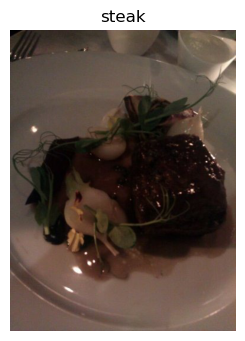

Image shape : (512, 512, 3)


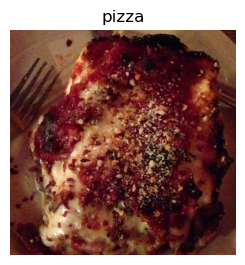

In [13]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('./data/pizza_steak/train/', 'steak')


plt.subplot(1,2,2)
pizza_img = view_random_image('./data/pizza_steak/train/', 'pizza')


## 2. preprocess data

In [14]:
pizza_img.shape

(512, 512, 3)

We are spliting it into batches so that our gpu can process .
If we have larger batch, model might not be able to learn properly.

32 is good batch size, *Yann leCun* suggested batch size , creator of CNN

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255) # to normalize color numbers from 0-255 to 0-1
valid_datagen = ImageDataGenerator(rescale=1./255) # to normalize color numbers from 0-255 to 0-1

# path to data directory
train_dir = './data/pizza_steak/train'
test_dir = './data/pizza_steak/test'


train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32, 
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
test_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='binary', seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [17]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [18]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

# 3 create model

In [17]:

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    

    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

                                              
model_4.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )                   



In [18]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


#  4 fit model

In [19]:
len(train_data), len(test_data)

47

In [21]:
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - ETA: 0s - loss: 0.4746 - accuracy: 0.7867

2023-03-03 07:26:41.464269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 5s 104ms/step - loss: 0.4746 - accuracy: 0.7867 - val_loss: 0.4241 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 4s 90ms/step - loss: 0.3330 - accuracy: 0.8667 - val_loss: 0.3968 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.1983 - accuracy: 0.9320 - val_loss: 0.3407 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.0917 - accuracy: 0.9733 - val_loss: 0.5964 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.0424 - accuracy: 0.9913 - val_loss: 0.5288 - val_accuracy: 0.8040


#  5. evaluate model
    - training curves
    - evaluation metrics
        - accuracy
        - precision
        - ...

<AxesSubplot:>

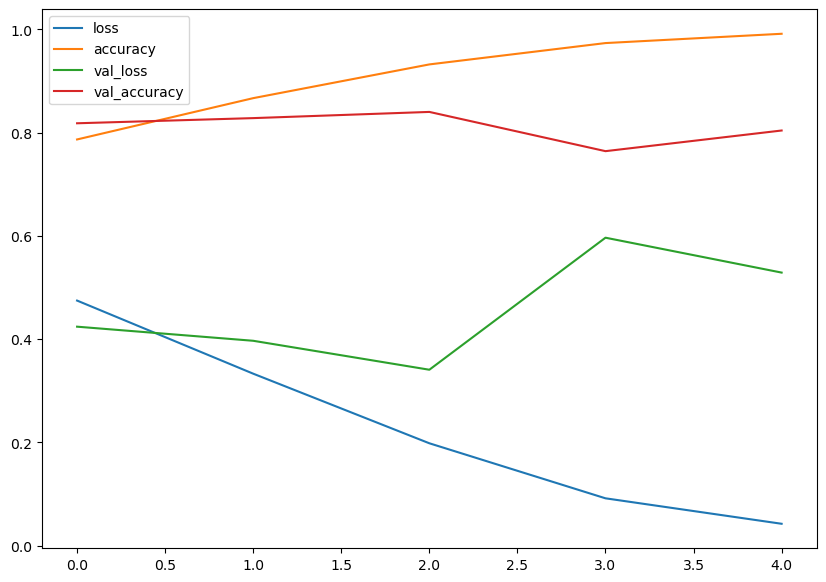

In [25]:
# plot training curves.
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [17]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="validation_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

>Key
when validation loss increases it mean model is overfitting

In [43]:
plot_loss_curves(history_5)


NameError: name 'history_5' is not defined

#  Adjust model parameters
 0. create base line
 1. beat baseline by overfitting the model
 2. reduce overfitting
 
 

> deregularization

How to induce overfitting
- Increase number of conv layers
- Increase number of conv filters
- Add dense layer after filtering

> regularization

How to reduce overfitting 
- add data augmentation
- add regulationation layers
- add more data

> Repeat until satisfied 

In [41]:
# Create new model which will be our baseline

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

In [43]:
model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [44]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5


2023-03-03 08:01:04.275965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.5915 - accuracy: 0.6813

2023-03-03 08:01:08.415045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 6s 105ms/step - loss: 0.5915 - accuracy: 0.6813 - val_loss: 0.4804 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 4s 91ms/step - loss: 0.4603 - accuracy: 0.7940 - val_loss: 0.3822 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4403 - accuracy: 0.8000 - val_loss: 0.3581 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 4s 88ms/step - loss: 0.3899 - accuracy: 0.8213 - val_loss: 0.3502 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3753 - accuracy: 0.8347 - val_loss: 0.3080 - val_accuracy: 0.8840


In [45]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 10)      

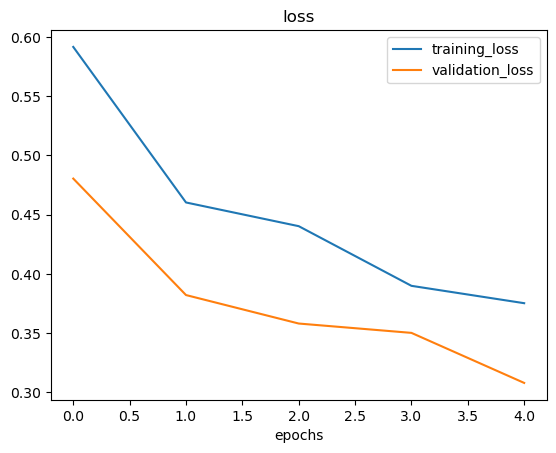

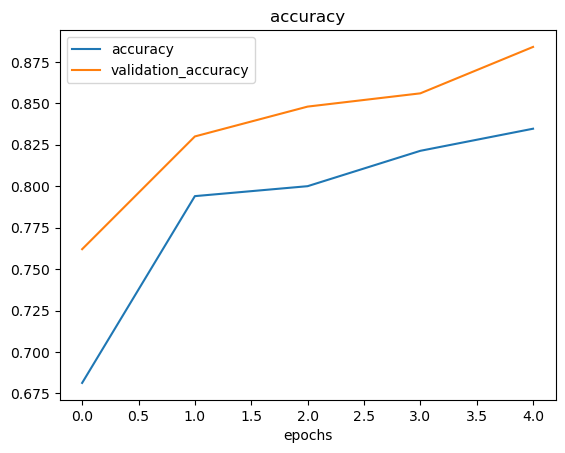

In [46]:
plot_loss_curves(history_5)

# more data augmentation

In [45]:
train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

> why augment data?
this will add more diversity and create more data.


In [46]:
IMG_SIZE = (224,224)

print("augmented train data")
train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir, target_size=IMG_SIZE,
                                                   batch_size=32, class_mode="binary", 
                                                   shuffle=True)# for testing shuffle false.
print("non augmented train data")
train_data = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE,
                                             batch_size=32, class_mode="binary", shuffle=False)
print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="binary")


augmented train data
Found 1500 images belonging to 2 classes.
non augmented train data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [28]:
images, labels = train_data.next()

augmented_images, augmented_labels = train_data_augmented.next()

showing random image: 21


Text(0.5, 1.0, 'original')

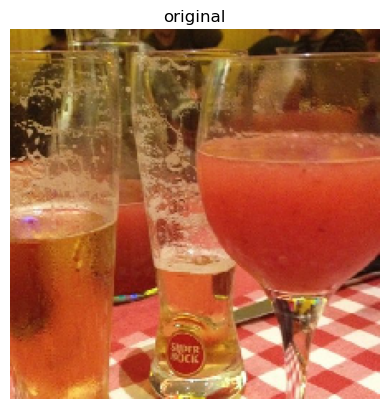

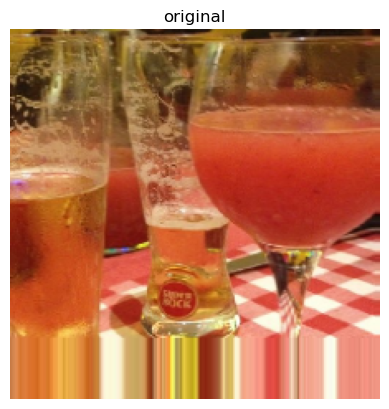

In [36]:
import random

random_number = random.randint(0,32)
print(f"showing random image: {random_number}")
plt.imshow(images[random_number])
plt.title("original")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.axis(False)
plt.title("original")



In [54]:


model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

In [55]:
model_6.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [56]:
history_6 = model_6.fit(train_data_augmented, epochs=10, steps_per_epoch=len(train_data_augmented), validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/10


2023-03-04 08:43:53.257511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6742 - accuracy: 0.5640

2023-03-04 08:44:03.698793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 12s 243ms/step - loss: 0.6742 - accuracy: 0.5640 - val_loss: 0.6227 - val_accuracy: 0.6120
Epoch 2/10
47/47 [==============================] - 12s 248ms/step - loss: 0.5904 - accuracy: 0.6873 - val_loss: 0.4454 - val_accuracy: 0.8160
Epoch 3/10
47/47 [==============================] - 12s 250ms/step - loss: 0.5468 - accuracy: 0.7313 - val_loss: 0.4245 - val_accuracy: 0.7980
Epoch 4/10
47/47 [==============================] - 12s 247ms/step - loss: 0.5152 - accuracy: 0.7540 - val_loss: 0.3810 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 11s 242ms/step - loss: 0.5157 - accuracy: 0.7507 - val_loss: 0.3516 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 12s 249ms/step - loss: 0.4875 - accuracy: 0.7620 - val_loss: 0.3275 - val_accuracy: 0.8540
Epoch 7/10
47/47 [==============================] - 12s 244ms/step - loss: 0.4807 - accuracy: 0.7720 - val_loss: 0.3435 - val_accuracy: 0.8420
Epoch 8/10

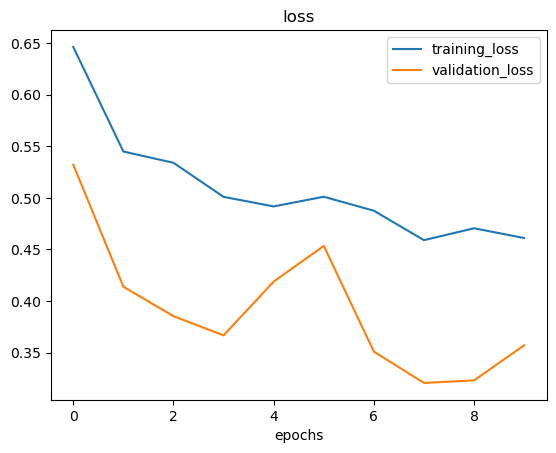

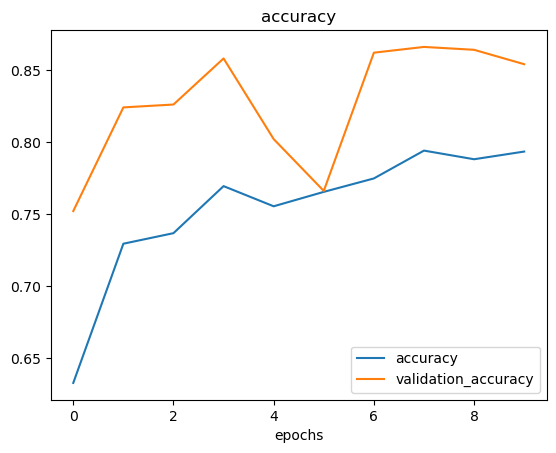

In [50]:
plot_loss_curves(history_6)

Repeat improvements 

- Increase number of layers (more conv2d/maxpooling layers)
- increase number of filters.
- train longer
- find ideal learning rate (it seem fine for now.)
- more data
- **use transfer learning** leverage what other model has learn and adjust for our use case.

Epoch 1/5


2023-03-04 08:42:08.663724: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.5953

2023-03-04 08:42:19.931961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 250ms/step - loss: 0.6566 - accuracy: 0.5953 - val_loss: 0.5805 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5599 - accuracy: 0.7227 - val_loss: 0.4096 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.5023 - accuracy: 0.7680 - val_loss: 0.3828 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 12s 249ms/step - loss: 0.5048 - accuracy: 0.7480 - val_loss: 0.4039 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4774 - accuracy: 0.7693 - val_loss: 0.4285 - val_accuracy: 0.8180


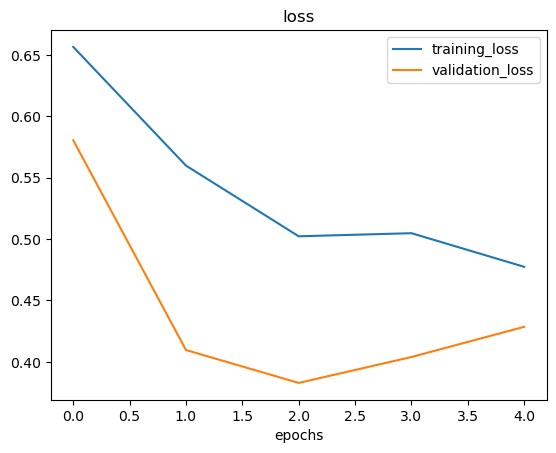

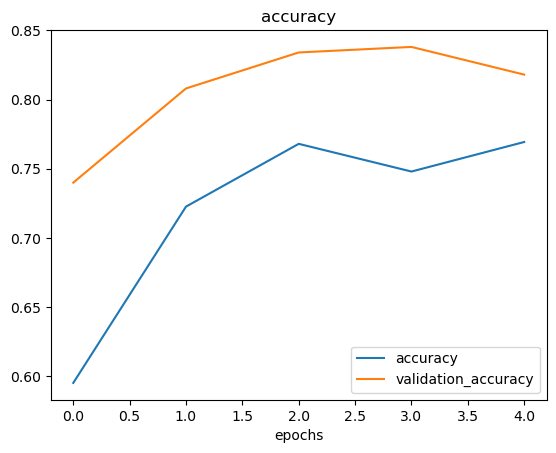

In [53]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")])

model_7.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data=test_data,
                       validation_steps=len(test_data))
plot_loss_curves(history_7)

In [57]:
print(class_names)

['pizza' 'steak']


In [60]:
import matplotlib.image as mppimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mppimg.imread('03-steak.jpeg')

--2023-03-04 08:46:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  4.74MB/s    in 0.4s    

2023-03-04 08:46:58 (4.74 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

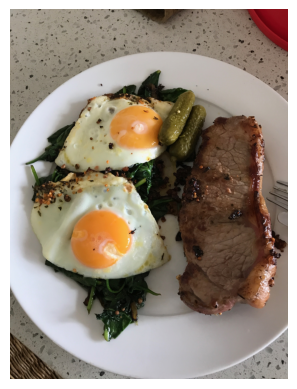

In [62]:
import matplotlib.pyplot as plt
plt.imshow(steak)
plt.axis(False)

In [65]:
steak.shape

(4032, 3024, 3)

## Pre process image
you custom data needs to be reshaped.

In [21]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img)
    
    img = tf.image.resize(img, size=[img_shape, img_shape])
    
    img = img/255.
    return img

In [90]:
steak = load_and_prep_image('03-steak.jpeg')

In [97]:
result = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 13ms/step


In [98]:
result

array([[0.92593867]], dtype=float32)

In [105]:
tf.round(result), class_names[int(tf.round(result))]

(<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>,
 'steak')

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)
    result = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(result))]
    
    plt.imshow(img)
    plt.title(pred_class)
    plt.axis(False)


1/1 [==============================] - 0s 11ms/step


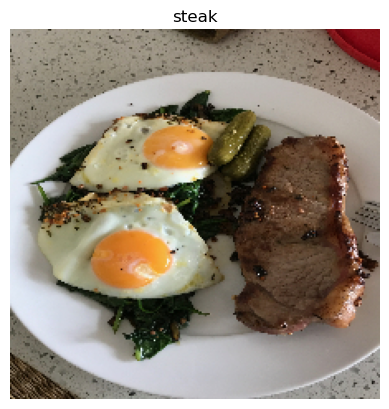

In [109]:
pred_and_plot(model_7, '03-steak.jpeg')

In [7]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pre


--2023-03-04 11:15:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.6’

03-pizza-dad.jpeg.6 100%[===================>]   2.74M  2.02MB/s    in 1.4s    

2023-03-04 11:15:41 (2.02 MB/s) - ‘03-pizza-dad.jpeg.6’ saved [2874848/2874848]



NameError: name 'pre' is not defined

# Multi-class image classification

1. become one with data
2. preprocess data
3. create model (baseline)
4. fit model(overfit)
5. evaluate model
6. adjust hyperparameter , improve mode, (try beat baseline)
7. repeat until satisfied

In [8]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-03-04 11:19:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  7.36MB/s    in 75s     

2023-03-04 11:21:06 (6.57 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [9]:
import os

for dirpath, dirnames, filenames in os.walk("data/10_food_classes_all_data"):
    print(f"there are {len(dirnames)} directiores in {len(filenames)} images in {dirpath}")

there are 2 directiores in 0 images in data/10_food_classes_all_data
there are 10 directiores in 0 images in data/10_food_classes_all_data/test
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/ice_cream
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/chicken_curry
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/steak
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/sushi
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/chicken_wings
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/grilled_salmon
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/hamburger
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/pizza
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/ramen
there are 0 directiores in 250 images in data/10_food_classes_all_data/test/fried_ric

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("data/10_food_classes_all_data/test")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

In [4]:
len(class_names), class_names

(10,
 array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
        'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
       dtype='<U14'))

In [5]:
train_dir = "data/10_food_classes_all_data/train/"
test_dir = "data/10_food_classes_all_data/test/"


Image shape : (384, 512, 3)


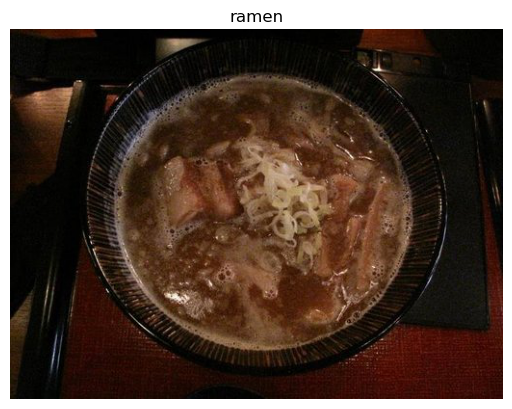

In [10]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))


In [36]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 85,  86,  88],
        [ 84,  85,  87],
        [ 82,  83,  85],
        ...,
        [137,  90,  64],
        [139,  92,  62],
        [140,  94,  60]],

       [[ 86,  87,  89],
        [ 85,  86,  88],
        [ 83,  84,  86],
        ...,
        [138,  91,  65],
        [138,  91,  61],
        [136,  90,  56]],

       [[ 87,  88,  90],
        [ 87,  88,  90],
        [ 86,  87,  89],
        ...,
        [142,  92,  67],
        [137,  91,  58],
        [134,  88,  52]],

       ...,

       [[102,  81,  90],
        [111,  90,  99],
        [124, 103, 112],
        ...,
        [ 81,  67,  64],
        [ 79,  65,  62],
        [ 76,  62,  59]],

       [[ 96,  81,  88],
        [ 98,  83,  90],
        [103,  86,  94],
        ...,
        [ 79,  65,  62],
        [ 78,  64,  61],
        [ 74,  60,  57]],

       [[111, 100, 106],
        [107,  96, 102],
        [101,  88,  95],
        ...,
        [ 76,  62,  5

## preprocess data


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./255) # to normalize color numbers from 0-255 to 0-1
valid_datagen = ImageDataGenerator(rescale=1./255) # to normalize color numbers from 0-255 to 0-1



train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32, 
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               seed=42)
test_data = valid_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode='categorical', seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [57]:

model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    

    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

                                              
model_8.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )                   



In [58]:
history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5


2023-03-04 11:37:03.419414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.4743 - accuracy: 0.1419

2023-03-04 11:37:21.006013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 23s 97ms/step - loss: 2.4743 - accuracy: 0.1419 - val_loss: 2.2220 - val_accuracy: 0.2168
Epoch 2/5
235/235 [==============================] - 24s 102ms/step - loss: 1.7268 - accuracy: 0.4319 - val_loss: 2.2081 - val_accuracy: 0.2420
Epoch 3/5
235/235 [==============================] - 23s 97ms/step - loss: 0.3110 - accuracy: 0.9207 - val_loss: 3.3969 - val_accuracy: 0.1820
Epoch 4/5
235/235 [==============================] - 23s 96ms/step - loss: 0.0352 - accuracy: 0.9945 - val_loss: 4.2793 - val_accuracy: 0.2156
Epoch 5/5
235/235 [==============================] - 22s 94ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 4.5115 - val_accuracy: 0.2252


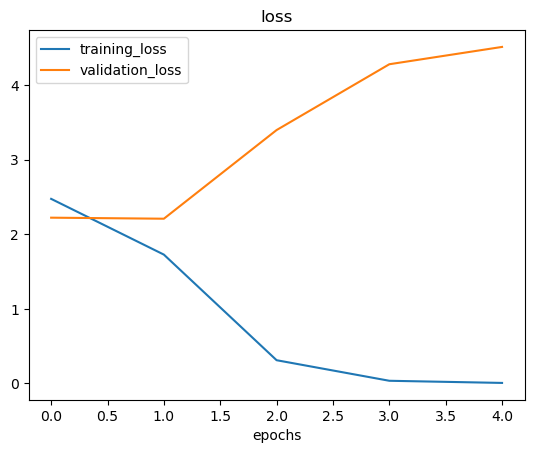

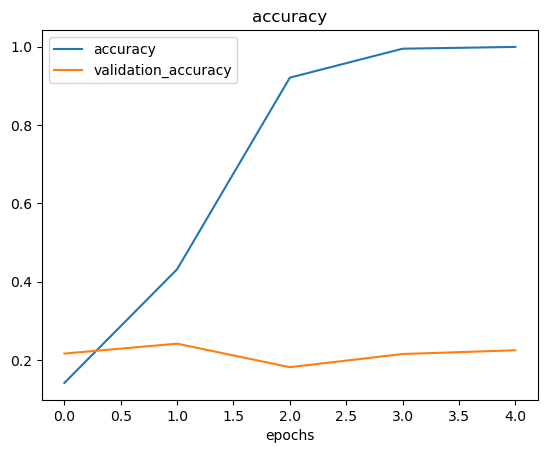

In [61]:
plot_loss_curves(history_8)

In [63]:


model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_9.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )           

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5


2023-03-04 11:42:20.952482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1741 - accuracy: 0.1880

2023-03-04 11:42:38.415027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 23s 97ms/step - loss: 2.1741 - accuracy: 0.1880 - val_loss: 2.0628 - val_accuracy: 0.2412
Epoch 2/5
235/235 [==============================] - 22s 95ms/step - loss: 1.9502 - accuracy: 0.3133 - val_loss: 1.8820 - val_accuracy: 0.3224
Epoch 3/5
235/235 [==============================] - 22s 94ms/step - loss: 1.7881 - accuracy: 0.3877 - val_loss: 1.8411 - val_accuracy: 0.3604
Epoch 4/5
235/235 [==============================] - 23s 96ms/step - loss: 1.6560 - accuracy: 0.4359 - val_loss: 1.8046 - val_accuracy: 0.3796
Epoch 5/5
235/235 [==============================] - 22s 93ms/step - loss: 1.4844 - accuracy: 0.5020 - val_loss: 1.8329 - val_accuracy: 0.3676


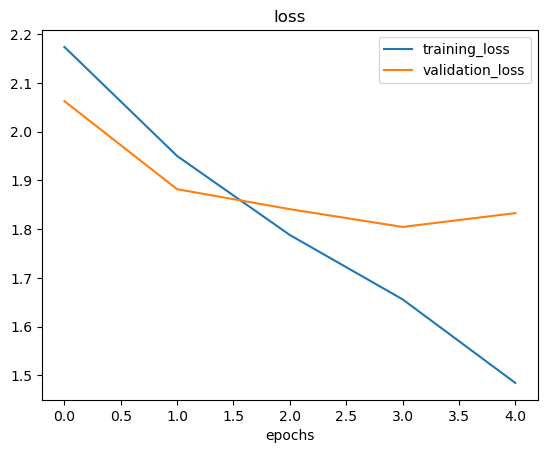

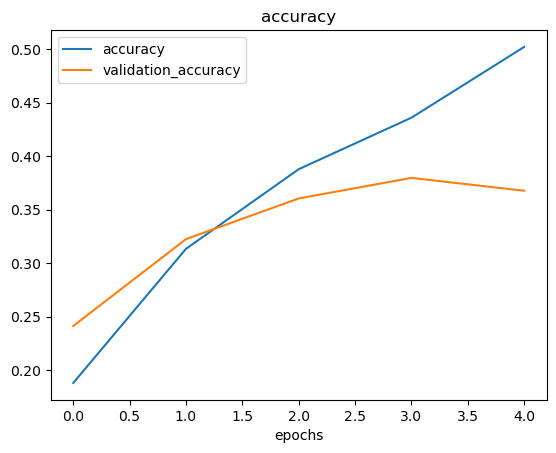

In [64]:
plot_loss_curves(history_9)

In [65]:

# CNN explainer model replica

model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),

    # can be written be spliting activation 
    # tf.keras.layers.Conv2D(10,3),
    # tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_10.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )           

history_10 = model_10.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5


2023-03-04 11:46:04.201634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2475 - accuracy: 0.1585

2023-03-04 11:46:22.280236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 24s 100ms/step - loss: 2.2475 - accuracy: 0.1585 - val_loss: 2.2143 - val_accuracy: 0.1932
Epoch 2/5
235/235 [==============================] - 23s 97ms/step - loss: 2.0935 - accuracy: 0.2536 - val_loss: 2.0455 - val_accuracy: 0.2736
Epoch 3/5
235/235 [==============================] - 23s 96ms/step - loss: 1.7166 - accuracy: 0.4179 - val_loss: 2.0532 - val_accuracy: 0.3004
Epoch 4/5
235/235 [==============================] - 22s 95ms/step - loss: 1.1707 - accuracy: 0.6171 - val_loss: 2.4533 - val_accuracy: 0.2856
Epoch 5/5
235/235 [==============================] - 22s 95ms/step - loss: 0.6007 - accuracy: 0.7996 - val_loss: 3.2865 - val_accuracy: 0.2532


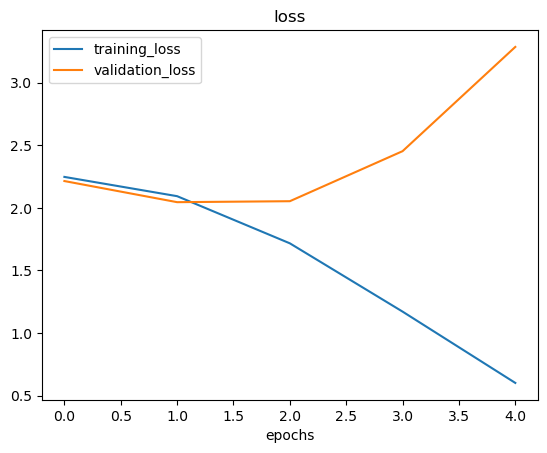

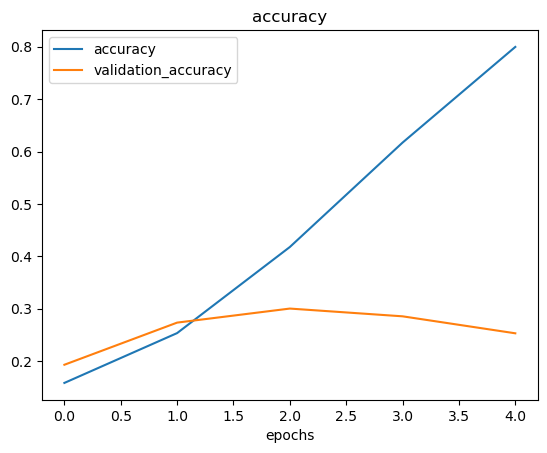

In [66]:
plot_loss_curves(history_10)

In [67]:
model_9.evaluate(test_data)

79/79 [==============================] - 5s 65ms/step - loss: 1.8329 - accuracy: 0.3676


[1.832947015762329, 0.3676000237464905]

In [68]:
model_10.evaluate(test_data)

79/79 [==============================] - 5s 65ms/step - loss: 3.2865 - accuracy: 0.2532


[3.286524772644043, 0.2532000243663788]

## data augmentation


In [13]:
train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.3,
                                            horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [14]:
IMG_SIZE = (224,224)

print("augmented train data")
train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir, target_size=IMG_SIZE,
                                                   batch_size=32, class_mode="categorical", 
                                                   shuffle=True)# for testing shuffle false.
print("non augmented train data")
train_data = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE,
                                             batch_size=32, class_mode="categorical", shuffle=True)
print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=32, class_mode="categorical")


augmented train data
Found 7500 images belonging to 10 classes.
non augmented train data
Found 7500 images belonging to 10 classes.
non augmented test data
Found 2500 images belonging to 10 classes.


In [73]:


model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_11.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )           

history_11 = model_11.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5


2023-03-04 11:57:38.542735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1929 - accuracy: 0.1921

2023-03-04 11:58:30.371435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 58s 243ms/step - loss: 2.1929 - accuracy: 0.1921 - val_loss: 2.0695 - val_accuracy: 0.2344
Epoch 2/5
235/235 [==============================] - 58s 245ms/step - loss: 2.0990 - accuracy: 0.2519 - val_loss: 2.0126 - val_accuracy: 0.2984
Epoch 3/5
235/235 [==============================] - 57s 244ms/step - loss: 2.0709 - accuracy: 0.2672 - val_loss: 1.9851 - val_accuracy: 0.3152
Epoch 4/5
235/235 [==============================] - 58s 247ms/step - loss: 2.0361 - accuracy: 0.2749 - val_loss: 1.9048 - val_accuracy: 0.3384
Epoch 5/5
235/235 [==============================] - 57s 244ms/step - loss: 2.0174 - accuracy: 0.2920 - val_loss: 1.8542 - val_accuracy: 0.3572


## adjust hyper parameter instead

model is overfitting, we need to reduce overfitting.
- get more data . doing it in model_11
- simpliy model (reduce number of layers, or number of hidden units)
- data augmentation
- use transfer learning. next chapter !!!

In [76]:

# CNN explainer model replica

model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),

    # can be written be spliting activation 
    # tf.keras.layers.Conv2D(10,3),
    # tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_12.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )           

history_12 = model_12.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

Epoch 1/5
  1/235 [..............................] - ETA: 1:26 - loss: 2.3043 - accuracy: 0.0938

2023-03-04 12:06:05.204739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.0568 - accuracy: 0.2623

2023-03-04 12:06:22.672931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 23s 98ms/step - loss: 2.0568 - accuracy: 0.2623 - val_loss: 1.8833 - val_accuracy: 0.3400
Epoch 2/5
235/235 [==============================] - 24s 100ms/step - loss: 1.7339 - accuracy: 0.4023 - val_loss: 1.8845 - val_accuracy: 0.3548
Epoch 3/5
235/235 [==============================] - 23s 98ms/step - loss: 1.3419 - accuracy: 0.5655 - val_loss: 1.9133 - val_accuracy: 0.3416
Epoch 4/5
235/235 [==============================] - 23s 96ms/step - loss: 0.8638 - accuracy: 0.7331 - val_loss: 2.1364 - val_accuracy: 0.3372
Epoch 5/5
235/235 [==============================] - 23s 97ms/step - loss: 0.4740 - accuracy: 0.8745 - val_loss: 2.4519 - val_accuracy: 0.3184


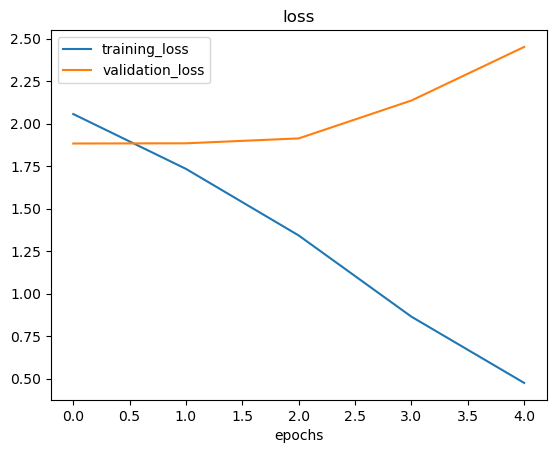

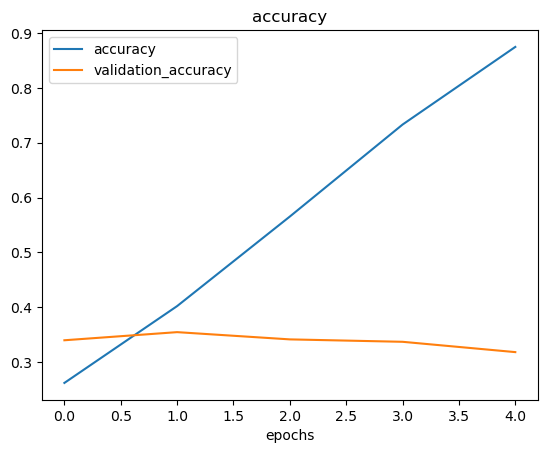

In [77]:
plot_loss_curves(history_12)

In [78]:
model_10.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [79]:
model_12.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 29160)             0         
                                                                 
 dense_10 (Dense)            (None, 10)              

In [15]:

# CNN explainer model replica

model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, # number of sliding windows, higher more complex model
                           kernel_size=3, # 3 or (3,3), size of sliding window
                           activation='relu', 
                           strides=(1,1), # 1 or (1,1), size of steps taken by slipding window
                            padding="valid", # if "same" input shape is same as output, if "valid" output shape is compressed.
                           input_shape=(224,224,3)),

    # can be written be spliting activation 
    # tf.keras.layers.Conv2D(10,3),
    # tf.keras.layers.Activation(activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")])

model_12.compile(loss='CategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy'
               )           

history_12 = model_12.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, 
                       validation_steps=len(test_data))

2023-03-05 12:32:18.473704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-05 12:32:18.474368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro
Epoch 1/5


2023-03-05 12:32:18.895635: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-05 12:32:19.196111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.2314 - accuracy: 0.1901

2023-03-05 12:33:12.071201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 59s 249ms/step - loss: 2.2314 - accuracy: 0.1901 - val_loss: 2.0612 - val_accuracy: 0.2868
Epoch 2/5
235/235 [==============================] - 59s 249ms/step - loss: 2.0870 - accuracy: 0.2599 - val_loss: 1.9711 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 59s 250ms/step - loss: 2.0148 - accuracy: 0.2941 - val_loss: 1.8950 - val_accuracy: 0.3388
Epoch 4/5
235/235 [==============================] - 59s 251ms/step - loss: 1.9900 - accuracy: 0.3083 - val_loss: 1.8591 - val_accuracy: 0.3744
Epoch 5/5
235/235 [==============================] - 59s 252ms/step - loss: 1.9503 - accuracy: 0.3264 - val_loss: 1.7805 - val_accuracy: 0.3980


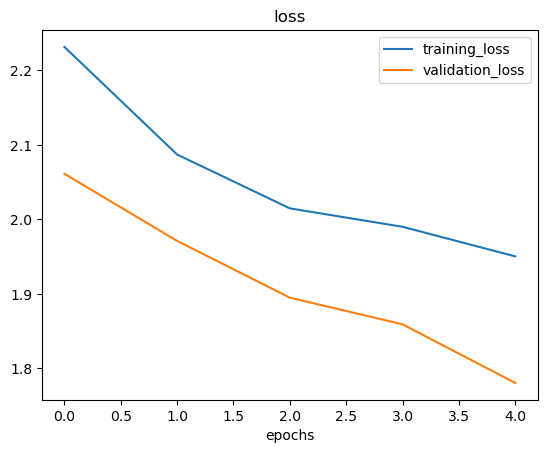

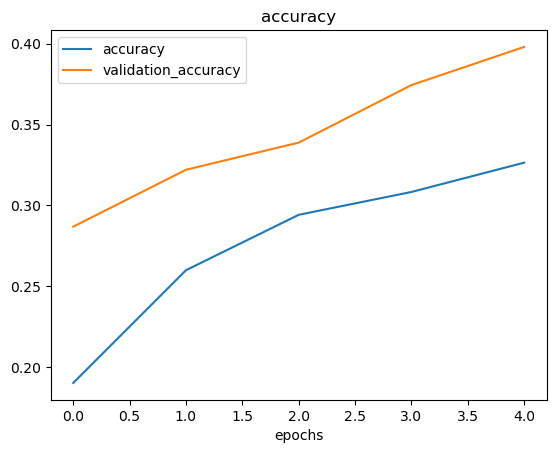

In [18]:
plot_loss_curves(history_12)

## repeat until stisfied

we can try to imporve performance by make the curve much closer. We can do it by following:

- restructing our model architecture (increasing layers/hidden units)
- adjust learning rate (it looks fine for now)
- try varing data augmentation
- train for longer
- try **transfer learning**

### Making prediction with our trained model
use prediction on custom images


In [41]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_and_prep_image(filename)
    result = model.predict(tf.expand_dims(img, axis=0))

    if len(result[0])>1:
        pred_class=class_names[tf.argmax(result[0])]
    else:
        pred_class = class_names[int(tf.round(result))]
    
    plt.imshow(img)
    plt.title(pred_class)
    plt.axis(False)
    plt.figure()

In [39]:
# download custom images

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2023-03-05 12:47:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.9’

03-pizza-dad.jpeg.9 100%[===================>]   2.74M  1.69MB/s    in 1.6s    

2023-03-05 12:47:50 (1.69 MB/s) - ‘03-pizza-dad.jpeg.9’ saved [2874848/2874848]

--2023-03-05 12:47:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

1/1 [==============================] - 0s 10ms/step


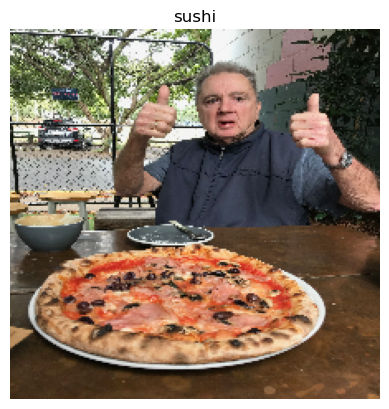

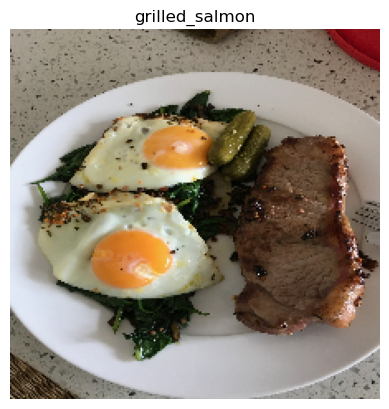

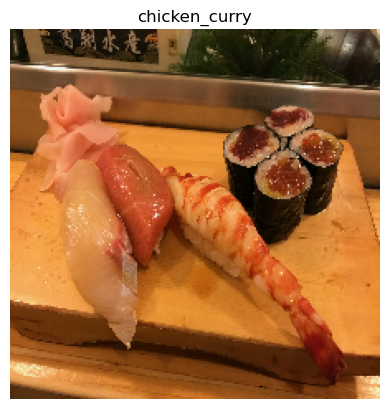

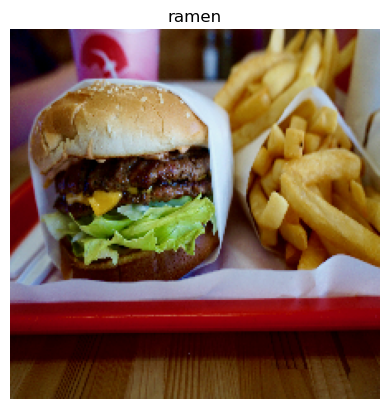

<Figure size 640x480 with 0 Axes>

In [42]:
pred_and_plot(model_12, "03-pizza-dad.jpeg", class_names)
pred_and_plot(model_12, "03-steak.jpeg", class_names)
pred_and_plot(model_12, "03-sushi.jpeg", class_names)
pred_and_plot(model_12, "03-hamburger.jpeg", class_names)


In [44]:
# model_12.save("model_12")

INFO:tensorflow:Assets written to: model_12/assets


INFO:tensorflow:Assets written to: model_12/assets
